In [155]:
import pandas as pd
import numpy as np

In [156]:
rows = pd.read_csv('../data/hourly_prices.csv', index_col=False, thousands=',')

In [157]:
MAX_EXP_ACT = np.max(rows['MinExpAct'])
EDUCATION_FLOATS = {
    'High School': 0.0,
    'Associates': 0.25,
    'Bachelors': 0.5,
    'Masters': 0.75,
    'Ph.D.': 1.0,
}

rows['EducationFloat'] = rows['Education'].map(lambda edu: EDUCATION_FLOATS.get(edu))
rows['MinExp'] = rows['MinExpAct'] #.div(MAX_EXP_ACT)
rows = rows[rows['EducationFloat'] >= 0.0]
rows = rows[rows['MinExpAct'] >= 0.0]
rows = rows[rows['CurrentYearPricing'] < 300.0]


Let's try building a simple linear regression model using the minimum experience and education as features.

In [158]:
features = rows.as_matrix(columns=['MinExp', 'EducationFloat'])
prices = rows.as_matrix(columns=['CurrentYearPricing'])

In [159]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(features, prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [160]:
model.predict([[8, 0.25]])

array([[ 100.93025326]])

It looks like Seaborn supports linear regression out-of-the-box too, so we can try it with that as well.

In [161]:
import seaborn as sns

% matplotlib inline

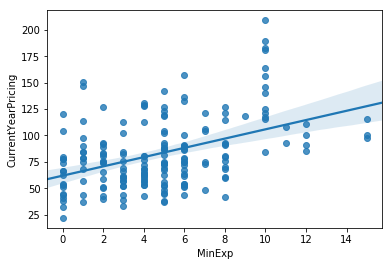

In [162]:
bachelor_rows = rows[rows['EducationFloat'] == 0.25]
sns.regplot(x="MinExp", y="CurrentYearPricing", data=bachelor_rows[bachelor_rows['Labor Category'].str.contains('Engineer')])